# Tutorial: Introduction into Cat Qubit Physics

In this tutorial, you learn about cat qubit physics that we use at Alice & Bob.
You will learn:
- basic Circit QED
- the Hamiltonian of our system
- how to obtain an approximate Hamiltonian
- how to simulate the time-evolution of the system using `dynamiqs`

We will also demonstrate a few things about cat qubits using the simulation tool `dynamiqs`.

|                                                |   0.2% ◆ elapsed 3.30ms ◆ remaining 0.00ms
|██████████████████████████████████████████████| 100.0% ◆ elapsed 451.89ms ◆ remaining 0.00ms

100%|████████████████████████████████████████████████████████| 50/50 [00:03<00:00, 15.61it/s]


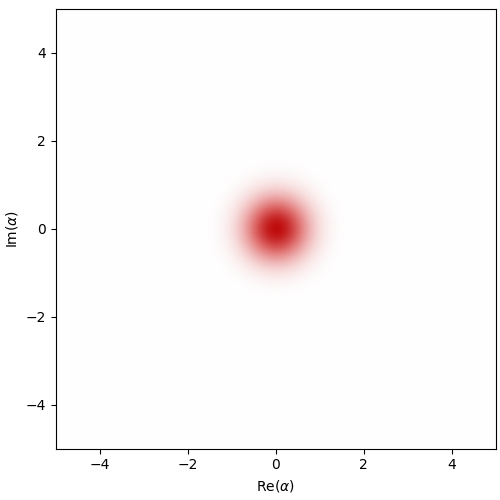

In [7]:
#Task 1.1

import math
import numpy
import dynamiqs as dq
import matplotlib.pyplot as plt
import numpy as np

g2 = 1.0
ed = -4.0
kappa_b = 10.0
# kappa_b = 5.0
kappa_2 = 4.0 * g2**2 / kappa_b
alpha = math.sqrt(-ed/g2)

na = 20 # Hilbert space dimension
nb = 5 # Hilbert space dimension
a, b = dq.destroy(na, nb)
psi0 = dq.fock((na,nb), (0,0)) # initial state
H = g2 * (a.dag() @ a.dag()) @ b + g2 * (a @ a) @ b.dag()
Hd = ed*b + ed*b.dag()

exp_ops = [a.dag() @ a]
t_save = np.linspace(0, 4, 100)
loss_op = math.sqrt(kappa_2)*(a @ a - alpha**2 * dq.eye(na,nb)) # loss operator
result_loss = dq.mesolve(H + Hd, [loss_op], psi0, t_save, exp_ops=exp_ops)

dq.plot.wigner_gif( result_loss.states.ptrace(0) )

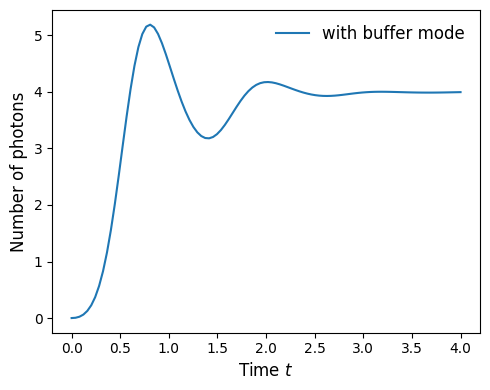

In [18]:
#Task1.1: Number of photons

fig, ax = plt.subplots(1, 1, figsize=(5, 4))
ax.plot(t_save, result_loss.expects[0].real, label="with buffer mode")
# ax.plot(t_save, modeb_w_buffer, label="mode b with buffer mode")
# ax.plot(t_save, result_noloss.expects[0].real, label=r"$\kappa = 0$")
# ax.set_ylim((0, 4.2))
# ax.set_xlim((0, 4))
ax.set_xlabel(r"Time $t$", fontsize=12)
ax.set_ylabel(r"Number of photons", fontsize=12)
ax.legend(fontsize=12, frameon=False)
plt.tight_layout()
plt.show()

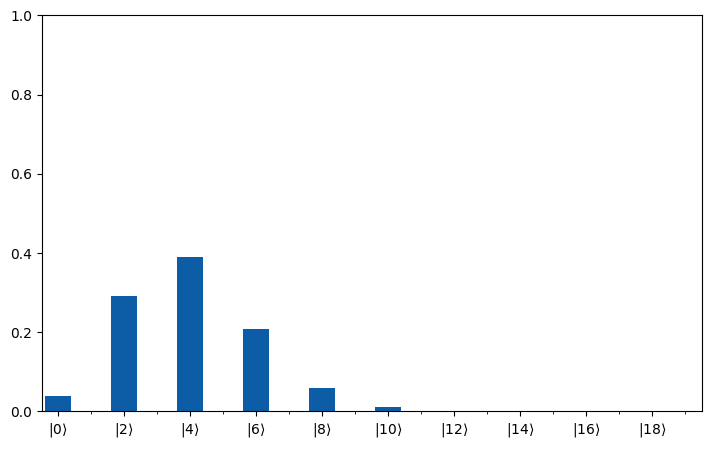

In [9]:
#Task 1.1: Photon number parity (of the final state)
dq.plot.fock(result_loss.states.ptrace(0)[-1] )

|                                                |   0.2% ◆ elapsed 0.62ms ◆ remaining 0.00ms
|███████████████████████████████████████████████| 100.0% ◆ elapsed 29.69ms ◆ remaining 0.00ms

100%|████████████████████████████████████████████████████████| 50/50 [00:02<00:00, 20.19it/s]


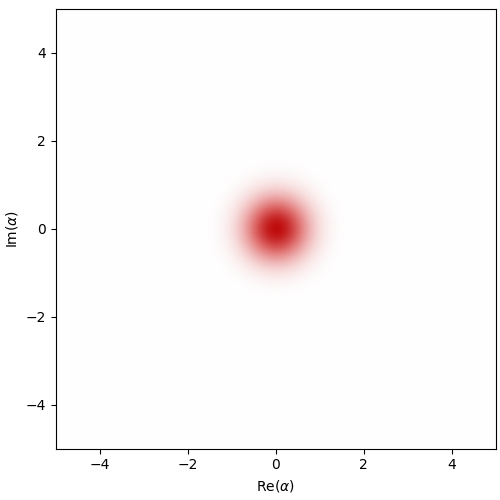

In [10]:
#Task 1.2

na = 20 # Hilbert space dimension
a = dq.destroy(na) # annihilaiton operator
psi0 = dq.fock(na, 0) # initial state
H = dq.zeros(na) # zero Hamiltonian
kappa_b = 10.0
g2 = 1.0
kappa_2 = 4.0*g2**2 / kappa_b # two-photon loss rate
alpha = 2.0 # cat size

tsave = np.linspace(0, 4, 100)

exp_ops = [a.dag() @ a]
loss_op = np.sqrt(kappa_2)*(a @ a - alpha**2 * dq.eye(na)) # loss operator
res = dq.mesolve(H, [loss_op], psi0, tsave, exp_ops = exp_ops)
dq.plot.wigner_gif(res.states)

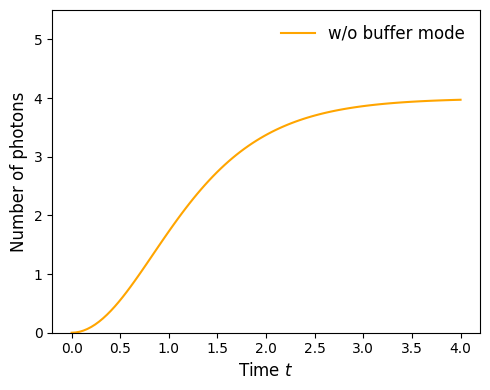

In [20]:
#Task 1.2: Number of photons

fig, ax = plt.subplots(1, 1, figsize=(5, 4))
# ax.plot(t_save, result_loss.expects[0].real, label="with buffer mode")
# ax.plot(tsave, res.expects[0].real, label="w/o buffer mode")
ax.plot(tsave, res.expects[0].real, label="w/o buffer mode", color="orange")
# ax.plot(t_save, result_noloss.expects[0].real, label=r"$\kappa = 0$")
ax.set_ylim((0, 5.5))
# ax.set_xlim((0, 4))
ax.set_xlabel(r"Time $t$", fontsize=12)
ax.set_ylabel(r"Number of photons", fontsize=12)
ax.legend(fontsize=12, frameon=False)
plt.tight_layout()
plt.show()